In [275]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json

In [276]:
# Read the CSV file
merged_df = pd.read_csv("merged_df.csv")
#Display Columns
merged_df.columns

Index(['imdb_id', 'id', 'release_date', 'runtime', 'title', 'cast', 'crew',
       'Year', 'Rated', 'Genre', 'Language', 'Country', 'Awards', 'imdbRating',
       'imdbVotes', 'BoxOffice', 'Total Awards', 'Decade', 'Season_of_Year',
       'BoxOffice_millions'],
      dtype='object')

In [277]:
merged_df.head()

,imdb_id,id,release_date,runtime,title,cast,crew,Year,Rated,Genre,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Total Awards,Decade,Season_of_Year,BoxOffice_millions
0,tt0114709,862,1995-10-30,81.0,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,G,"Animation, Adventure, Comedy",English,United States,Nominated for 3 Oscars. 29 wins & 24 nominatio...,8.3,1084764.0,223225679.0,56,1990,Fall,223.225679
1,tt0113497,8844,1995-12-15,104.0,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,PG,"Adventure, Comedy, Family","English, French",United States,4 wins & 11 nominations,7.1,382657.0,100499940.0,15,1990,Winter,100.499940
2,tt0113228,15602,1995-12-22,101.0,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995.0,PG-13,"Comedy, Romance","English, Italian, German",United States,2 wins & 2 nominations,6.7,30011.0,71518503.0,4,1990,Winter,71.518503
3,tt0114885,31357,1995-12-22,127.0,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995.0,R,"Comedy, Drama, Romance",English,United States,9 wins & 10 nominations,6.0,12462.0,67052156.0,19,1990,Winter,67.052156
4,tt0113041,11862,1995-02-10,106.0,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995.0,PG,"Comedy, Family, Romance",English,United States,1 win & 2 nominations,6.1,42152.0,76594107.0,3,1990,Winter,76.594107


In [278]:
# Display the number of rows and nulls in the DataFrame
print(f"Initial DataFrame length: {len(merged_df)}")
print("Number of nulls:")
print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])

#Null Awards are fine since Total Awards column has 0 for nulls

Initial DataFrame length: 6391
Number of nulls:
Awards    935
dtype: int64


In [279]:
# Gender codes:
# 0: Unknown
# 1: Female
# 2: Male

# Function to count male and female characters
def count_genders(cast):
    # Convert string to list of dictionaries using eval
    cast_data = eval(cast)  # Make sure to safely use eval here
    male_count = sum(1 for cast_member in cast_data if cast_member['gender'] == 2)  # Count males
    female_count = sum(1 for cast_member in cast_data if cast_member['gender'] == 1)  # Count females
    return pd.Series([male_count, female_count])

# Create new gender columns

# Apply the function to the "cast" column of merged_df
merged_df[['cast_males', 'cast_females']] = merged_df['cast'].apply(count_genders)

# Apply the function to the "crew" column of merged_df
merged_df[['crew_males', 'crew_females']] = merged_df['crew'].apply(count_genders)

# Calculate percent female cast, crew, and combined with rounding to 2 decimal places
merged_df['percent_female_cast'] = round((merged_df['cast_females'] / 
                                           (merged_df['cast_males'] + merged_df['cast_females'])) * 100, 2)
merged_df['percent_female_crew'] = round((merged_df['crew_females'] / 
                                           (merged_df['crew_males'] + merged_df['crew_females'])) * 100, 2)
merged_df['percent_female_combined'] = round((merged_df['percent_female_cast'] + 
                                               merged_df['percent_female_crew']) / 2, 2)




# Display the updated merged_df
merged_df.columns


Index(['imdb_id', 'id', 'release_date', 'runtime', 'title', 'cast', 'crew',
       'Year', 'Rated', 'Genre', 'Language', 'Country', 'Awards', 'imdbRating',
       'imdbVotes', 'BoxOffice', 'Total Awards', 'Decade', 'Season_of_Year',
       'BoxOffice_millions', 'cast_males', 'cast_females', 'crew_males',
       'crew_females', 'percent_female_cast', 'percent_female_crew',
       'percent_female_combined'],
      dtype='object')

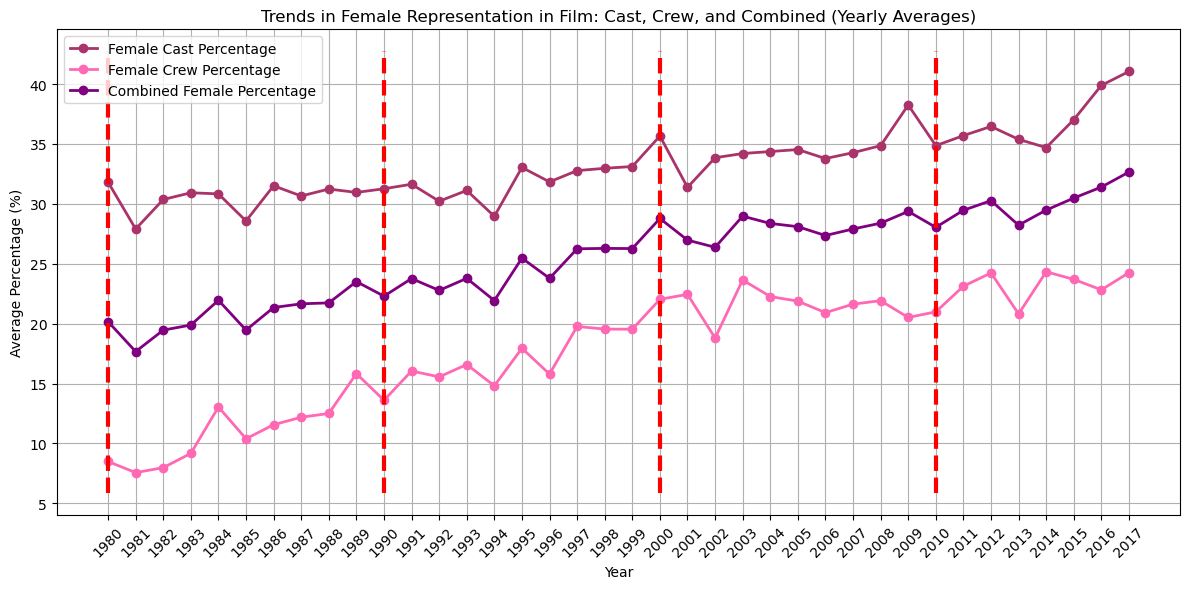

In [280]:
# Start Visualizing:

# 1. Female Representation:

# Start Visualizing

# Group by Year and calculate the mean percent_female_cast and percent_female_crew
gender_grouped_df = merged_df.groupby('Year').agg({
    'percent_female_cast': 'mean',
    'percent_female_crew': 'mean',
    'percent_female_combined': 'mean'
})

# Assuming gender_grouped_df is already defined as per your code
plt.figure(figsize=(12, 6))

# Plotting the lines with improved aesthetics
plt.plot(gender_grouped_df.index, gender_grouped_df['percent_female_cast'], label='Female Cast Percentage', 
         color='#AA336A', marker='o', markersize=6, linewidth=2)
plt.plot(gender_grouped_df.index, gender_grouped_df['percent_female_crew'], label='Female Crew Percentage', 
         color='hotpink', marker='o', markersize=6, linewidth=2)
plt.plot(gender_grouped_df.index, gender_grouped_df['percent_female_combined'], label='Combined Female Percentage', 
         color='purple', marker='o', markersize=6, linewidth=2)

# Adding vertical lines for the start of each decade
# List of decades
decade_starts = [1980, 1990, 2000, 2010]
# Add vertical lines for each decade
plt.vlines(decade_starts, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Trends in Female Representation in Film: Cast, Crew, and Combined (Yearly Averages)')
plt.xlabel('Year')
plt.ylabel('Average Percentage (%)')
plt.xticks(gender_grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('output/female_representation_by_year.png')  # Save as PNG

# Show plot
plt.show()


This graph shows trends in female representation in film from 1980 to 2017, with data broken down into cast, crew, and combined percentages. The overall trajectory shows a steady increase in female representation across all categories. Notably, the representation of women in film crews has seen the most substantial growth, although all categories exhibit periods of fluctuation. These variations suggest that while progress has been made, it has not been uniform or consistent year over year. The combined percentages highlight an overall improvement in gender diversity, but there is still a gap between the cast and crew representation levels, with cast representation remaining higher.

In [281]:
# Print percentages by Decade from merged_df
print("Percentages by Decade:")
print("--------------------------------------------")

# Group by Decade and calculate the mean values
decade_averages = merged_df.groupby('Decade').agg({
    'percent_female_cast': 'mean',
    'percent_female_crew': 'mean',
    'percent_female_combined': 'mean'
})

# Iterate through the results and print
for decade, averages in decade_averages.iterrows():
    print(f"Average Female Cast ({decade}): {averages['percent_female_cast']:.2f}")
    print(f"Average Female Crew ({decade}): {averages['percent_female_crew']:.2f}")
    print(f"Average Female Combined ({decade}): {averages['percent_female_combined']:.2f}")
    print("--------------------------------------------")


Percentages by Decade:
--------------------------------------------
Average Female Cast (1980): 30.55
Average Female Crew (1980): 11.24
Average Female Combined (1980): 20.90
--------------------------------------------
Average Female Cast (1990): 31.71
Average Female Crew (1990): 16.96
Average Female Combined (1990): 24.29
--------------------------------------------
Average Female Cast (2000): 34.50
Average Female Crew (2000): 21.56
Average Female Combined (2000): 28.03
--------------------------------------------
Average Female Cast (2010): 36.65
Average Female Crew (2010): 22.97
Average Female Combined (2010): 29.86
--------------------------------------------


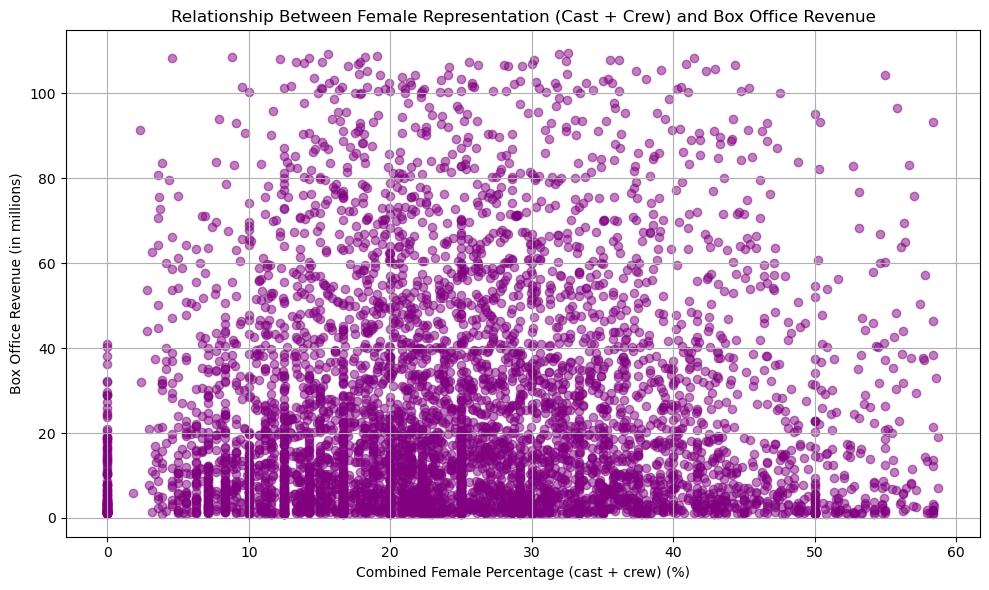

In [282]:
# Calculate Q1, Q3, and IQR for 'percent_female_combined' and 'BoxOffice_millions'
Q1_percent, Q3_percent = merged_df['percent_female_combined'].quantile([0.25, 0.75])
IQR_percent = Q3_percent - Q1_percent

Q1_boxoffice, Q3_boxoffice = merged_df['BoxOffice_millions'].quantile([0.25, 0.75])
IQR_boxoffice = Q3_boxoffice - Q1_boxoffice

# Define bounds and filter out outliers
female_no_outliers_df = merged_df[
    (merged_df['percent_female_combined'].between(Q1_percent - 1.5 * IQR_percent, Q3_percent + 1.5 * IQR_percent)) &
    (merged_df['BoxOffice_millions'].between(Q1_boxoffice - 1.5 * IQR_boxoffice, Q3_boxoffice + 1.5 * IQR_boxoffice))
]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(female_no_outliers_df['percent_female_combined'], female_no_outliers_df['BoxOffice_millions'], color='purple', alpha=0.5)
plt.title('Relationship Between Female Representation (Cast + Crew) and Box Office Revenue')
plt.xlabel('Combined Female Percentage (cast + crew) (%)')
plt.ylabel('Box Office Revenue (in millions)')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image and show
plt.savefig('output/female_representation_boxoffice_scatter.png')
plt.show()


The plot shows no clear correlation between the percentage of women involved in films and box office revenue, indicating that factors other than gender representation may play a more significant role in determining box office success. While female representation has increased over time, its direct impact on revenue remains unclear, suggesting the need to explore additional variables that could influence financial performance.

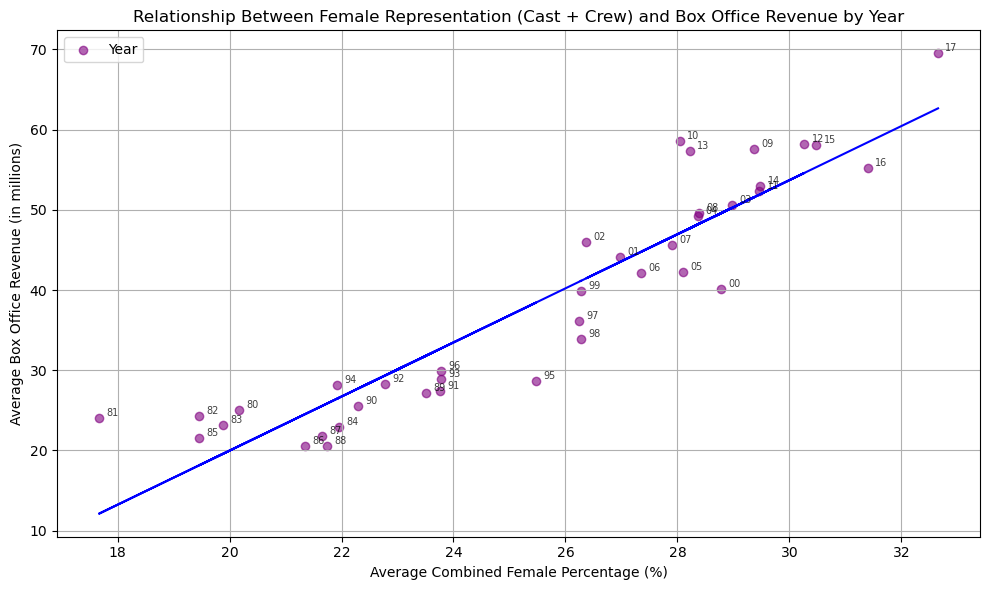

In [283]:
# Group by Year and calculate the mean for combined female percentage and box office revenue
female_boxoffice_grouped_df = merged_df.groupby('Year').agg({
    'percent_female_combined': 'mean',
    'BoxOffice_millions': 'mean'
}).reset_index()  # Reset index to access 'Year'

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with 'percent_female_combined' on x-axis and 'BoxOffice_millions' on y-axis
plt.scatter(female_boxoffice_grouped_df['percent_female_combined'], female_boxoffice_grouped_df['BoxOffice_millions'], 
            color='purple', alpha=0.6, label="Year")

# Label each dot with the corresponding year
for i, row in female_boxoffice_grouped_df.iterrows():
    # Format the year to show only the last two digits, e.g., '80 for 1980
    year_short = str(int(row['Year']))[-2:]
    
    # Add the text label to the plot with the formatted year, offsetting the position
    plt.text(row['percent_female_combined'] + 0.35,  # Adjust the x offset (+0.5)
             row['BoxOffice_millions'] + 0,         # Adjust the y offset (+5)
             year_short, 
             fontsize=7, ha='right', va='bottom', alpha=0.75, color='black')

# Perform linear regression to get the slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(female_boxoffice_grouped_df['percent_female_combined'], female_boxoffice_grouped_df['BoxOffice_millions'])

# Calculate trend line values
trendline = intercept + slope * female_boxoffice_grouped_df['percent_female_combined']

# Plot the trend line
plt.plot(female_boxoffice_grouped_df['percent_female_combined'], trendline, color='blue')

# Adding titles and labels
plt.title('Relationship Between Female Representation (Cast + Crew) and Box Office Revenue by Year')
plt.xlabel('Average Combined Female Percentage (%)')
plt.ylabel('Average Box Office Revenue (in millions)')

# Grid for better visibility
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()

# Save the plot as an image
plt.savefig('output/female_representation_line_year.png')  # Save as PNG

plt.show()


When comparing the average percentage of women in film to the average box office revenue by year, we observe an upward trend in both metrics. This suggests that while both female representation and box office revenues have increased over time, the two trends may be developing independently rather than being directly linked. 

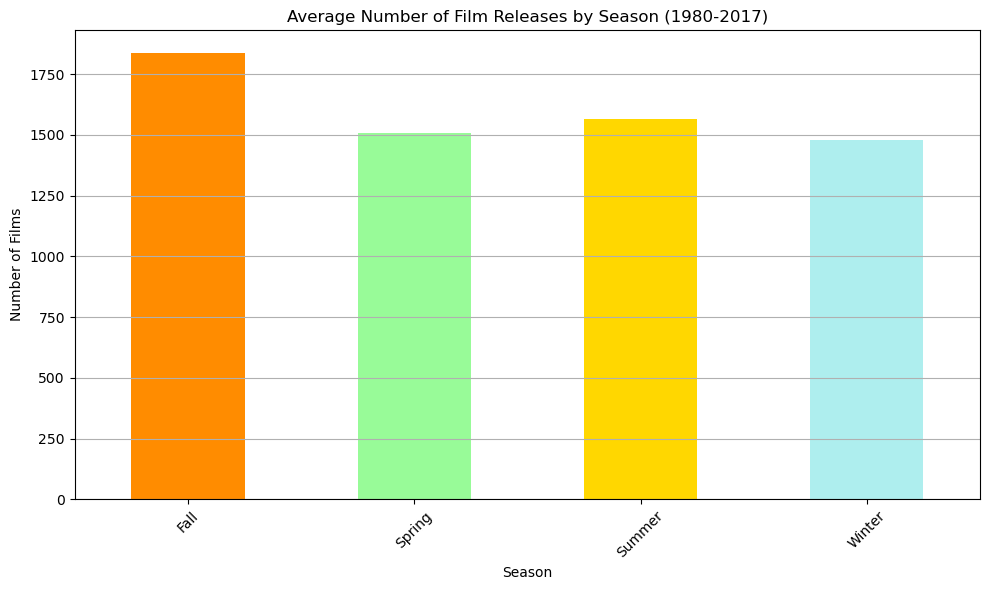

In [284]:
# 2. Seasonality of Film Releases:

# Step 1: Group by Season and count releases
season_grouped_df = merged_df['Season_of_Year'].value_counts().sort_index()

# Define colors for each season
season_colors = {
    'Winter': '#AEEEEE',  # Soft light blue
    'Spring': '#98FB98',  # Pale green
    'Summer': '#FFD700',  # Gold
    'Fall': '#FF8C00'     # Dark orange
}

# Map colors to the corresponding seasons
colors = [season_colors[season] for season in season_grouped_df.index]

# Step 2: Create the bar graph
plt.figure(figsize=(10, 6))
season_grouped_df.plot(kind='bar', color=colors, alpha=1)

# Adding titles and labels
plt.title('Average Number of Film Releases by Season (1980-2017)')
plt.xlabel('Season')
plt.ylabel('Number of Films')

# Display the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as an image
plt.savefig('output/avg_film_releases_season.png')  # Save as PNG

# Show the plot
plt.show()


This bar chart highlights the average number of film releases per season from 1980 to 2017, with fall having the highest number, followed by spring, summer, and winter. The data suggests a seasonal trend, where studios prioritize fall for more releases, possibly to align with awards season. Winter and spring have fewer releases, indicating less industry focus during these periods.

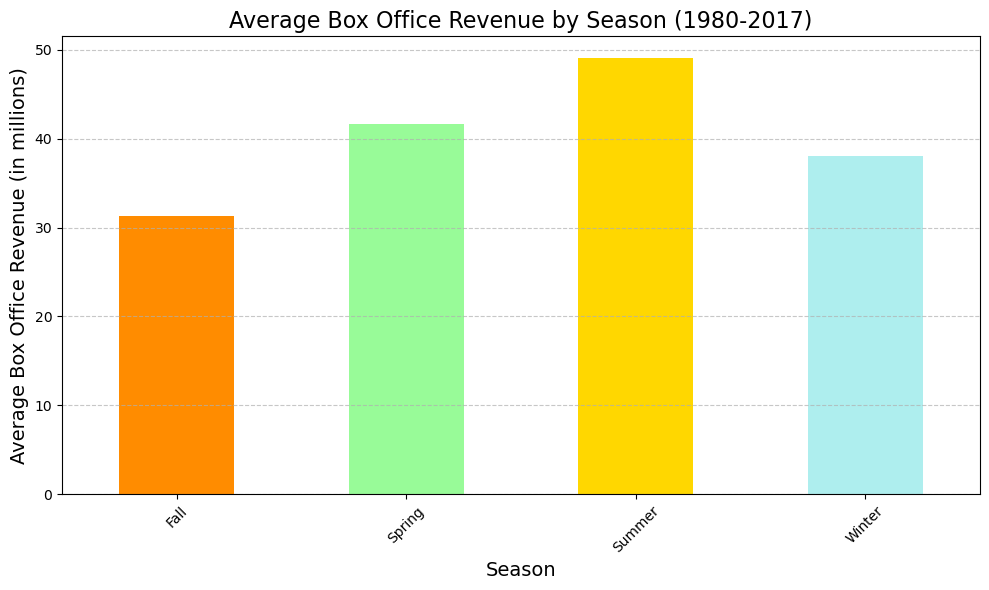

In [285]:
# Group by Season and calculate the mean BoxOffice_millions
season_boxoffice_df = merged_df.groupby('Season_of_Year')['BoxOffice_millions'].mean()

# Create the bar graph
plt.figure(figsize=(10, 6))
season_boxoffice_df.plot(kind='bar', color=colors, alpha=1)

# Adding titles and labels
plt.title('Average Box Office Revenue by Season (1980-2017)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Box Office Revenue (in millions)', fontsize=14)

# Display the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as an image
plt.savefig('output/avg_boxoffice_season.png')  # Save as PNG

# Show the plot
plt.show()

This bar chart illustrates the average box office revenue for films released across different seasons from 1980 to 2017. Summer movies consistently generate the highest revenue, followed by spring and winter, while fall films have the lowest earnings. This trend suggests that seasonal factors, such as summer vacations and holidays, likely influence movie-going behavior and box office performance.

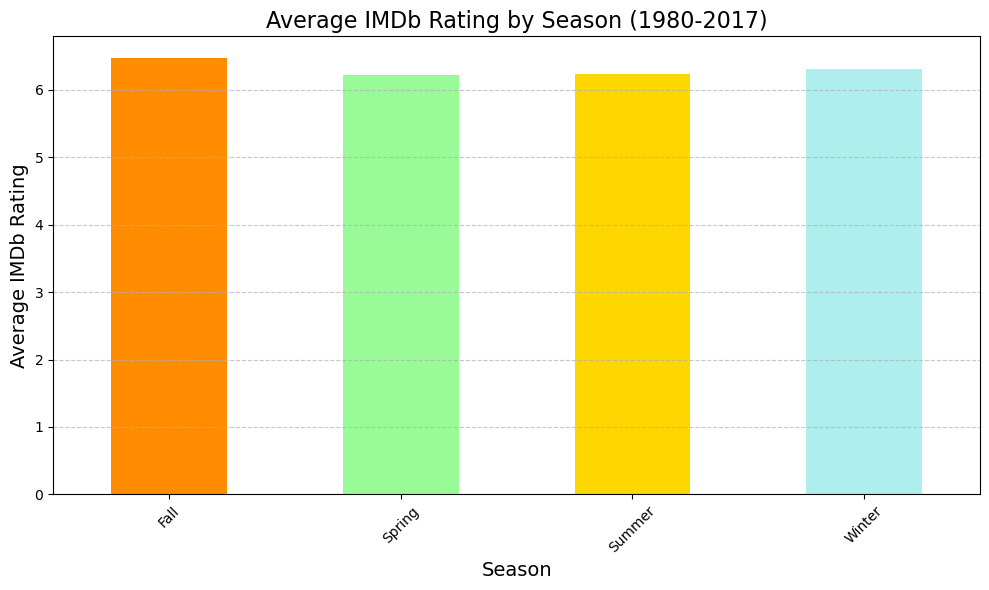

In [286]:
# Group by Season and calculate the mean imdbRating
season_imdb_df = merged_df.groupby('Season_of_Year')['imdbRating'].mean()

# Create the bar graph
plt.figure(figsize=(10, 6))
season_imdb_df.plot(kind='bar', color=colors, alpha=1)

# Adding titles and labels
plt.title('Average IMDb Rating by Season (1980-2017)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)

# Display the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as an image
plt.savefig('output/avg_rating_season.png')  # Save as PNG

# Show the plot
plt.show()


This bar chart shows that average IMDb ratings by season are fairly consistent, with Fall slightly outperforming the other seasons. This could be due to films released during Fall aligning with award season, where critically acclaimed films often debut. Despite this small variation, the overall consistency suggests that film quality and audience reception do not vary dramatically by season. Other factors like genre or marketing may have a greater impact on ratings than release timing alone.

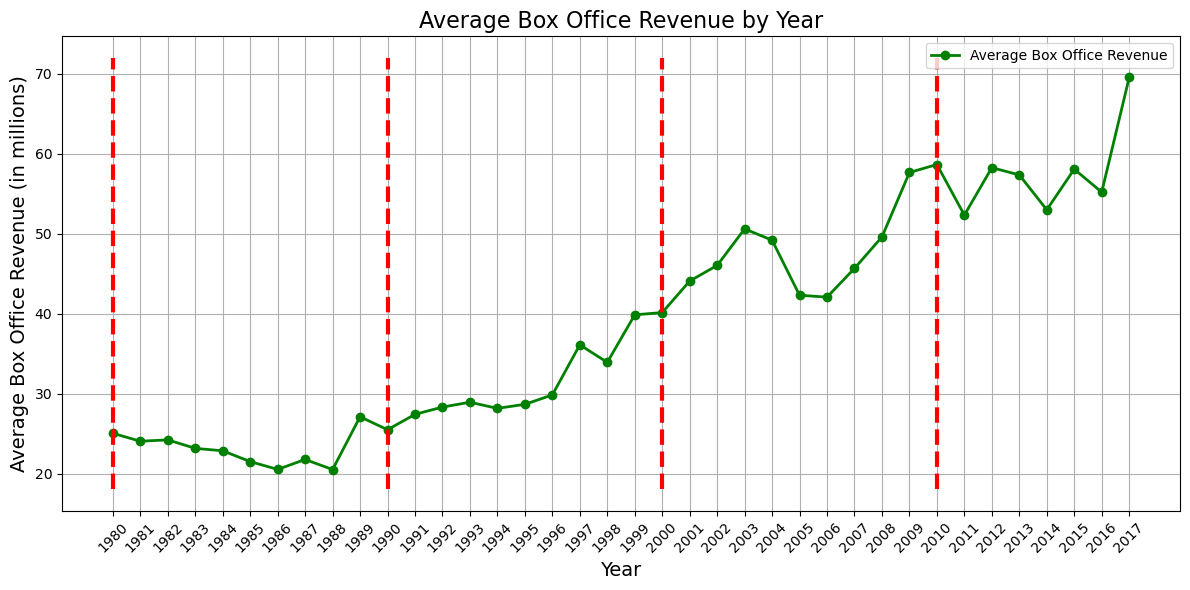

In [287]:
# 3. Box Office and Award Success:
# Start Visualizing:

# Group by Year and calculate the mean BoxOffice_millions
boxoffice_grouped_df = merged_df.groupby('Year')['BoxOffice_millions'].mean()

plt.figure(figsize=(12, 6))

# Plotting the average BoxOffice_millions with improved aesthetics
plt.plot(boxoffice_grouped_df.index, boxoffice_grouped_df, label='Average Box Office Revenue', 
         color='green', marker='o', markersize=6, linewidth=2)

# Adding vertical lines for the start of each decade

# Add vertical lines for each decade
plt.vlines(decade_starts, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Average Box Office Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Box Office Revenue (in millions)', fontsize=14)
plt.xticks(boxoffice_grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('output/average_box_office_by_year.png')  # Save as PNG

# Show plot
plt.show()



The line graph shows the average box office revenue per year from 1980 to 2017, with a steady upward trend. A notable spike occurs in the late 1990s and early 2000s, followed by slight fluctuations in later years. Despite these variations, the overall trajectory indicates consistent growth in box office performance over the period. This suggests increasing movie attendance and higher revenue-generating potential over time.

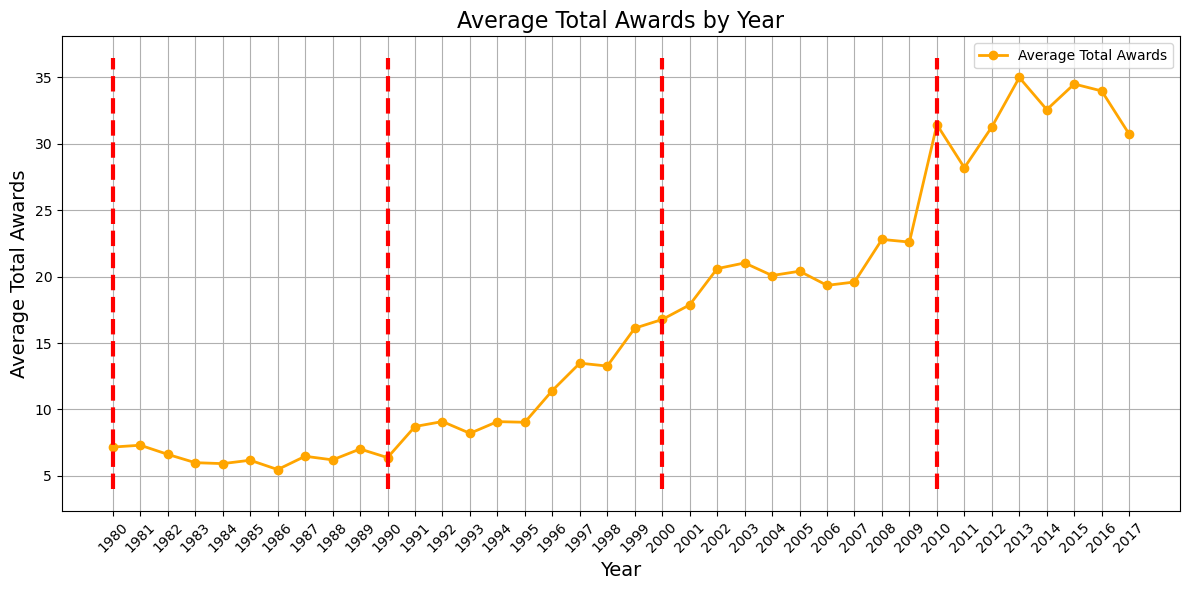

In [288]:
# Start Visualizing:

# Group by Year and calculate the mean Total Awards
awards_grouped_df = merged_df.groupby('Year')['Total Awards'].mean()

plt.figure(figsize=(12, 6))

# Plotting the average Total Awards with improved aesthetics
plt.plot(awards_grouped_df.index, awards_grouped_df, label='Average Total Awards', 
         color='#FFA500', marker='o', markersize=6, linewidth=2)

# Adding vertical lines for the start of each decade
# List of decades
decade_starts = [1980, 1990, 2000, 2010]
# Add vertical lines for each decade
plt.vlines(decade_starts, *plt.ylim(), color='red', linestyle='--', linewidth=3)

# Adding titles and labels
plt.title('Average Total Awards by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Total Awards', fontsize=14)
plt.xticks(awards_grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('output/average_total_awards_by_year.png')  # Save as PNG

# Show plot
plt.show()


This line graph depicts the average total awards and nominations per year from 1980 to 2017, showing a clear upward trend. A sharp spike is evident in the early 2000s, followed by minor fluctuations in later years. Despite these variations, the overall trajectory suggests increasing recognition through both awards and nominations over time.

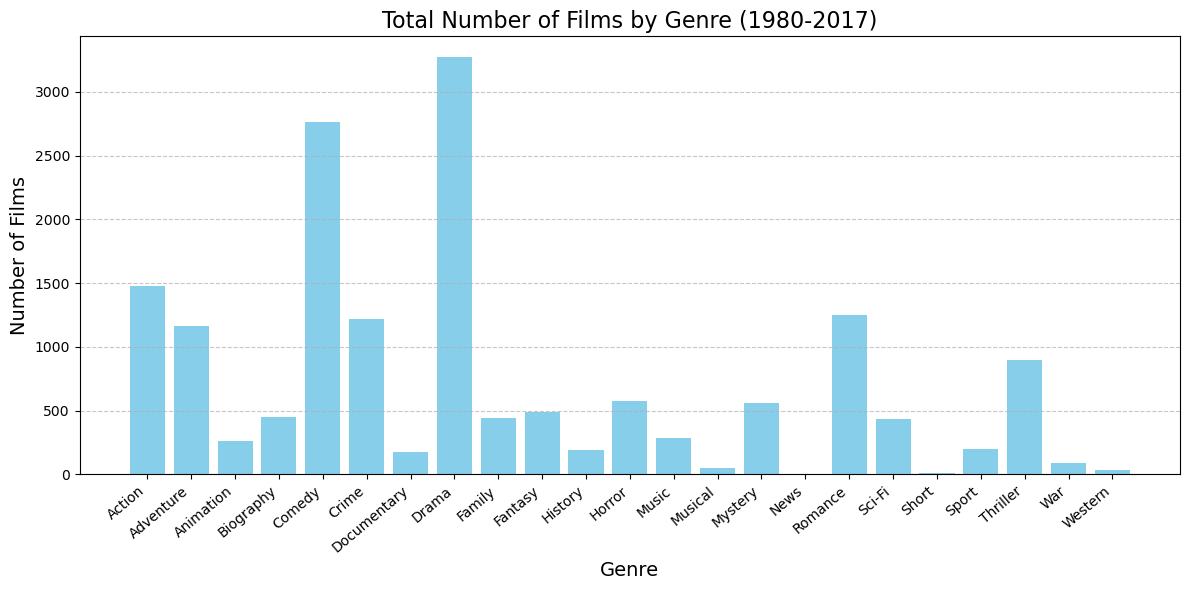

In [289]:
# Create a copy of merged_df to avoid modifying the original DataFrame
genre_merged_copy_df = merged_df.copy()

# Ensure each genre is a single word and explode the Genre column to get one genre per row
genre_merged_copy_df['Genre'] = genre_merged_copy_df['Genre'].str.split(', ')  # Convert string of genres to list
genre_exploded_df = genre_merged_copy_df.explode('Genre')  # Create separate rows for each genre

# Remove empty genres
genre_exploded_df = genre_exploded_df[genre_exploded_df['Genre'].str.strip().ne('')]

# Group by Genre to count the number of films for each genre
genre_counts_df = genre_exploded_df.groupby('Genre').size().reset_index(name='Film Count')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Film Count'], color='skyblue')

# Adding titles and labels
plt.title('Total Number of Films by Genre (1980-2017)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('output/num_films_by_genre')  # Save as PNG

# Show plot
plt.show()


The bar graph displays the total number of films produced by genre between 1980 and 2017. Drama emerges as the most prolific genre, followed closely by Comedy and then Action. Among the least represented genres are Western, Musical, and Documentary films. This graph reveals a significant disparity in film production across different genres, suggesting varying levels of popularity and commercial viability.

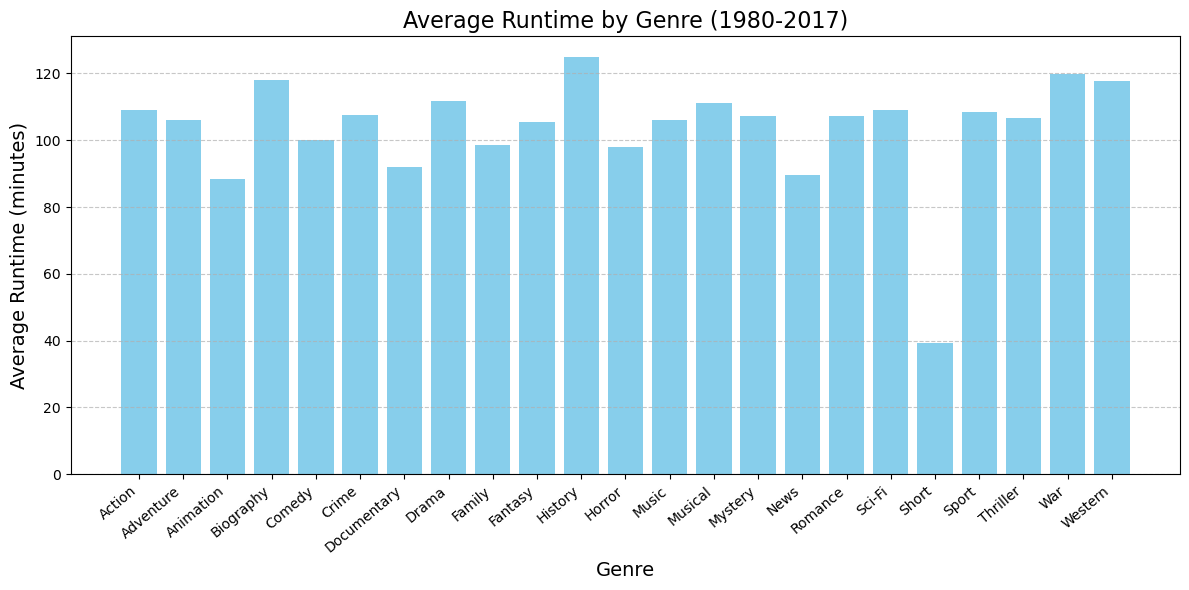

In [290]:
# Group by Genre to calculate the average runtime for each genre
genre_runtime_df = genre_exploded_df.groupby('Genre')['runtime'].mean().reset_index(name='Average Runtime')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_runtime_df['Genre'], genre_runtime_df['Average Runtime'], color='skyblue')

# Adding titles and labels
plt.title('Average Runtime by Genre (1980-2017)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Runtime (minutes)', fontsize=14)
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as an image
plt.savefig('output/runtime_by_genre')  # Save as PNG

# Show plot
plt.show()

This graph shows that History, Biography, War, and Western genres have some of the longest runtimes, while Animation and Short films feature the shortest runtimes. It highlights the variation in film lengths across genres, likely shaped by different storytelling techniques and audience preferences.

# Analysis and Conclusion
This exploratory data analysis aimed to uncover trends in the film industry from 1980 to 2017, focusing on diversity in filmmaking, seasonal release patterns, box office performance, awards distribution, and genre patterns.

## Female Representation in Film Production
Our analysis indicates an upward trend in female representation in film production over the decades. The average percentage of female cast members grew from 30.55% in the 1980s to 36.65% in the 2010s, marking an increase of approximately 6%. A more dramatic shift occurred among female crew members, whose average representation rose from 11.24% in the 1980s to 22.97% in the 2010s, reflecting a pronounced increase of around 11%. This suggests a growing recognition of the need for female voices and perspectives in behind-the-scenes roles. The combined average of female representation (cast and crew) also saw a notable rise from 20.90% in the 1980s to 29.86% in the 2010s, indicating an overall improvement in gender diversity across both on-screen and off-screen roles.

We examined the correlation between female representation and box office revenue. Although a scatter plot revealed no significant correlation, our graph, "Relationship Between Female Representation (Cast + Crew) and Box Office Revenue by Year," illustrates that the increase in average combined female representation parallels the growth in box office revenue.

### Key Statistical Analysis
In our analysis, we utilized several key statistical methods. Aggregation summarized female representation data by decade, allowing us to observe trends over time. Averages were calculated to quantify female involvement in casting and crew roles. Regression lines modeled the relationship between female representation and time, providing a visual representation of the trends. Additionally, correlation analysis assessed the strength and direction of the relationship between female representation and box office revenue, revealing a positive correlation that underscores the importance of diversity in film production.

## Release Seasonality
Analyzing seasonal patterns revealed some surprising trends. Fall emerged as the most popular release season, with an average of 1,850 films released during this period, compared to around 1,500 for other seasons (spring, summer, and winter). Despite this popularity, Fall was the weakest in terms of box office performance, with an average revenue of approximately $30 million per film. In contrast, summer boasted the highest average box office revenue at nearly $50 million.

In terms of ratings, Fall held a slight edge with an average IMDb rating of 6.5, compared to an average of 6.25 for other seasons. However, this difference is relatively small, indicating that while Fall may attract slightly higher critical reception, it doesn't necessarily translate into financial success.

### Key Statistical Analysis
In this analysis, we employed various statistical methods, including comparative analysis to assess differences in film releases and box office performance across seasons. We calculated averages to summarize the number of films, their respective revenues, and IMDb ratings.

## Box Office Performance and Awards
Analyzing trends in box office performance reveals that the 1980s experienced stagnant growth in average box office revenue per year, starting at approximately $25 million and ending the decade at a similar level. However, the 1990s saw momentum building, with average revenue growing by nearly $15 million by the end of the decade. This upward trend continued in the 2000s, with nearly a $20 million increase by decade’s end. The 2010s, while the most fluctuating in terms of revenue, ultimately rose by nearly $10 million by 2017.

When comparing the average number of awards and nominations per year, a similar pattern emerges, mirroring box office trends. The 1980s displayed little variation, while the 1990s experienced a doubling of the average number of awards. This trend persisted into the 2000s with another doubling in average awards. The 2010s, much like box office performance, were marked by fluctuations, with little overall growth in the number of awards by the decade's end.

### Key Statistical Analysis
Our analysis of box office performance and the number of awards employed key statistical concepts such as calculating yearly averages and conducting comparative analysis between these two metrics. This approach allowed us to identify similar growth patterns and fluctuations across both revenue and awards, providing a clearer picture of the evolving film landscape over time.